In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'e:\\subjects\\parallel_computing\\final_project\\test'

In [3]:
df = pd.read_csv('../data/output/mulmat_output_8.txt')
df.head()

,number_of_computed,matmul_mono,broadcast_time,common_time,dns_time
0,3000x1024x1024,33.967,8.200,10.873,2.531
1,3333x768x768,21.079,3.036,6.424,1.280
2,490x64x64,0.007,0.001,0.003,0.002
3,200x128x128,0.011,0.002,0.004,0.003
4,500x256x256,0.105,0.018,0.032,0.023


In [4]:
n = df['number_of_computed'].values
times_mono = []
times_board_cast = []
times_cannon = []
times_dsn = []
# sorted(n)
n = np.array([i[0] * i[1] * i[2] for i in [list(map(int, x.split('x'))) for x in df['number_of_computed'].values]])
y = sorted(set(n))

for i in y:
    times_mono.append(df['matmul_mono'][n==i].mean())
    times_board_cast.append(df['broadcast_time'][n==i].mean())
    times_cannon.append(df['common_time'][n==i].mean())
    times_dsn.append(df['dns_time'][n==i].mean())


Text(0.5, 1.0, 'Matrix Multiplication Time Comparison 8 Threads')

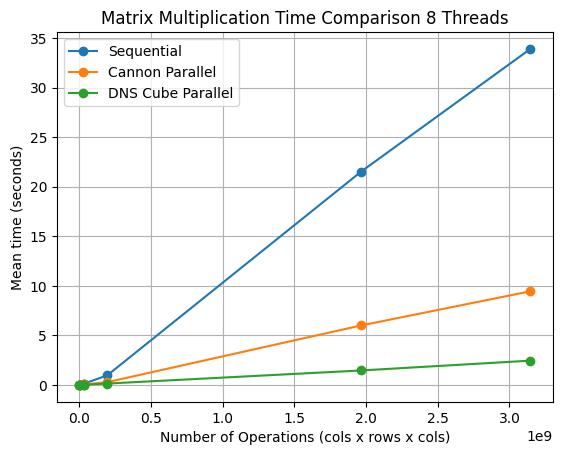

In [5]:
plt.plot(y, times_mono, label='Sequential', marker='o')
# plt.plot(y, times_board_cast, label='1d Parallel', marker='o')
plt.plot(y, times_cannon, label='Cannon Parallel', marker='o')
plt.plot(y, times_dsn, label='DNS Cube Parallel', marker='o')

plt.legend()
plt.xlabel('Number of Operations (cols x rows x cols)')
plt.ylabel('Mean time (seconds)')
plt.grid()
plt.title('Matrix Multiplication Time Comparison 8 Threads')

In [6]:
df = pd.read_csv('../data/output/mulmat_output_9.txt')
df.head()

,number_of_computed,matmul_mono,broadcast_time,common_time,dns_time
0,3000x1024x1024,27.441,4.882,3.356,4.113
1,3333x768x768,21.739,2.786,2.519,2.303
2,490x64x64,0.006,0.001,0.002,0.001
3,200x128x128,0.011,0.002,0.004,0.001
4,500x256x256,0.109,0.017,0.027,0.017


In [7]:
n = df['number_of_computed'].values
times_mono = []
times_board_cast = []
times_cannon = []
times_dsn = []
# sorted(n)
n = np.array([i[0] * i[1] * i[2] for i in [list(map(int, x.split('x'))) for x in df['number_of_computed'].values]])
y = sorted(set(n))

for i in y:
    times_mono.append(df['matmul_mono'][n==i].mean())
    times_board_cast.append(df['broadcast_time'][n==i].mean())
    times_cannon.append(df['common_time'][n==i].mean())
    times_dsn.append(df['dns_time'][n==i].mean())


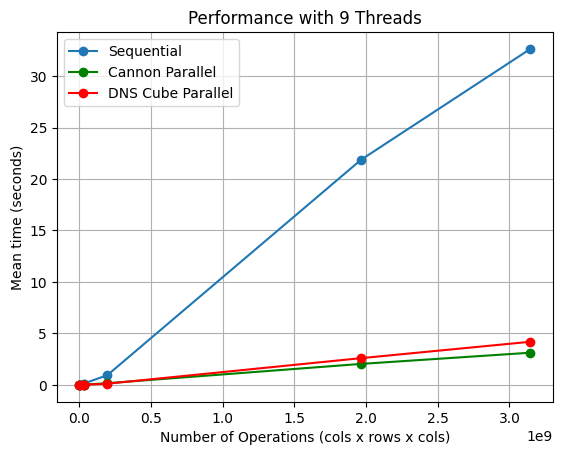

In [8]:
plt.plot(y, times_mono, label='Sequential', marker='o')
# plt.plot(y, times_board_cast, label='1d Parallel', marker='o', color='orange')
plt.plot(y, times_cannon, label='Cannon Parallel', marker='o', color='green')
plt.plot(y, times_dsn, label='DNS Cube Parallel', marker='o', color='red')

plt.legend()
plt.xlabel('Number of Operations (cols x rows x cols)')
plt.ylabel('Mean time (seconds)')
plt.title('Performance with 9 Threads')
# plt.ylim(-1, 50)
plt.grid()

## 10 Threads

In [9]:
df = pd.read_csv('../data/output/mulmat_output_10.txt')
df.head()

,number_of_computed,matmul_mono,broadcast_time,common_time,dns_time
0,3000x1024x1024,31.224,4.325,3.039,3.847
1,3333x768x768,21.398,2.696,1.820,2.438
2,490x64x64,0.009,0.001,0.003,0.002
3,200x128x128,0.014,0.002,0.004,0.002
4,500x256x256,0.145,0.020,0.031,0.017


In [10]:
n = df['number_of_computed'].values
times_mono = []
times_board_cast = []
times_cannon = []
times_dsn = []
# sorted(n)
n = np.array([i[0] * i[1] * i[2] for i in [list(map(int, x.split('x'))) for x in df['number_of_computed'].values]])
y = sorted(set(n))

for i in y:
    times_mono.append(df['matmul_mono'][n==i].mean())
    times_board_cast.append(df['broadcast_time'][n==i].mean())
    times_cannon.append(df['common_time'][n==i].mean())
    times_dsn.append(df['dns_time'][n==i].mean())


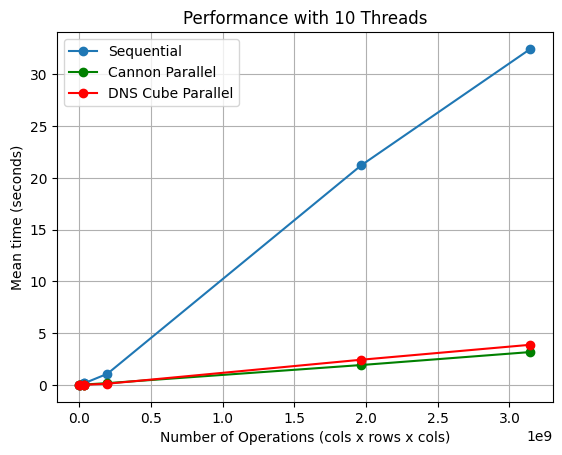

In [11]:
plt.plot(y, times_mono, label='Sequential', marker='o')
# plt.plot(y, times_board_cast, label='1d Parallel', marker='o', color='orange')
plt.plot(y, times_cannon, label='Cannon Parallel', marker='o', color='green')
plt.plot(y, times_dsn, label='DNS Cube Parallel', marker='o', color='red')

plt.legend()
plt.xlabel('Number of Operations (cols x rows x cols)')
plt.ylabel('Mean time (seconds)')
plt.title('Performance with 10 Threads')
plt.grid()

## 11 threads

In [12]:
df = pd.read_csv('../data/output/mulmat_output_10.txt')
df.head()

,number_of_computed,matmul_mono,broadcast_time,common_time,dns_time
0,3000x1024x1024,31.224,4.325,3.039,3.847
1,3333x768x768,21.398,2.696,1.820,2.438
2,490x64x64,0.009,0.001,0.003,0.002
3,200x128x128,0.014,0.002,0.004,0.002
4,500x256x256,0.145,0.020,0.031,0.017


In [13]:
n = df['number_of_computed'].values
times_mono = []
times_board_cast = []
times_cannon = []
times_dsn = []
# sorted(n)
n = np.array([i[0] * i[1] * i[2] for i in [list(map(int, x.split('x'))) for x in df['number_of_computed'].values]])
y = sorted(set(n))

for i in y:
    times_mono.append(df['matmul_mono'][n==i].mean())
    times_board_cast.append(df['broadcast_time'][n==i].mean())
    times_cannon.append(df['common_time'][n==i].mean())
    times_dsn.append(df['dns_time'][n==i].mean())


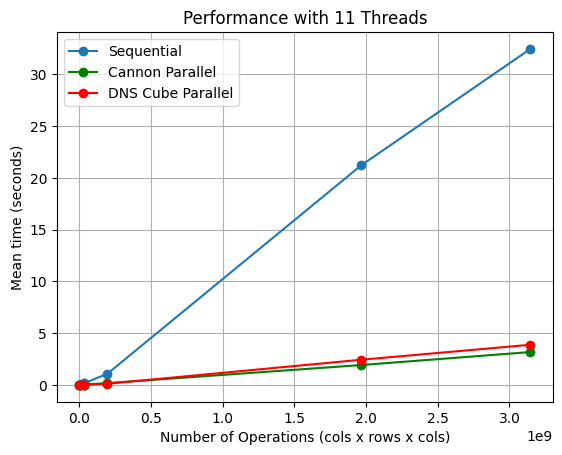

In [14]:
plt.plot(y, times_mono, label='Sequential', marker='o')
# plt.plot(y, times_board_cast, label='1d Parallel', marker='o', color='orange')
plt.plot(y, times_cannon, label='Cannon Parallel', marker='o', color='green')
plt.plot(y, times_dsn, label='DNS Cube Parallel', marker='o', color='red')

plt.legend()
plt.xlabel('Number of Operations (cols x rows x cols)')
plt.ylabel('Mean time (seconds)')
plt.title('Performance with 11 Threads')
plt.grid()

## 12 threads

In [15]:
df = pd.read_csv('../data/output/mulmat_output_12.txt')
df.head()

,number_of_computed,matmul_mono,broadcast_time,common_time,dns_time
0,3000x1024x1024,31.973,4.402,2.983,4.095
1,3333x768x768,18.607,2.589,1.650,2.201
2,490x64x64,0.007,0.001,0.003,0.001
3,200x128x128,0.010,0.002,0.003,0.003
4,500x256x256,0.111,0.016,0.026,0.014


In [16]:
n = df['number_of_computed'].values
times_mono = []
times_board_cast = []
times_cannon = []
times_dsn = []
# sorted(n)
n = np.array([i[0] * i[1] * i[2] for i in [list(map(int, x.split('x'))) for x in df['number_of_computed'].values]])
y = sorted(set(n))

for i in y:
    times_mono.append(df['matmul_mono'][n==i].mean())
    # times_board_cast.append(df['broadcast_time'][n==i].mean())
    times_cannon.append(df['common_time'][n==i].mean())
    times_dsn.append(df['dns_time'][n==i].mean())


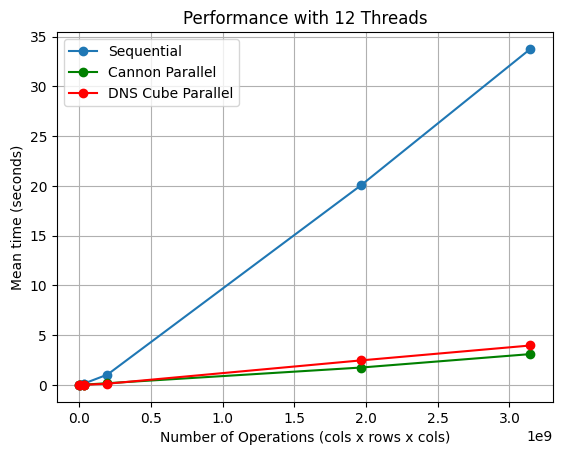

In [17]:
plt.plot(y, times_mono, label='Sequential', marker='o')
# plt.plot(y, times_board_cast, label='1d Parallel', marker='o', color='orange')
plt.plot(y, times_cannon, label='Cannon Parallel', marker='o', color='green')
plt.plot(y, times_dsn, label='DNS Cube Parallel', marker='o', color='red')

plt.legend()
plt.xlabel('Number of Operations (cols x rows x cols)')
plt.ylabel('Mean time (seconds)')
plt.title('Performance with 12 Threads')
# plt.ylim(-1, 50)
plt.grid()

# compute_eig

In [18]:
parallel = pd.read_csv('../data/output/norm_reducing_jacobi_output.txt')
serial = pd.read_csv('../data/output/norm_reducing_jacobi_serial_output.txt')

In [19]:
parallel.sort_values('matrix_size', inplace=True)
serial.sort_values('matrix_size', inplace=True)

In [20]:
x = parallel['matrix_size'].to_numpy()

serial_times = serial['computation_time_seconds'].to_numpy()
parallel_times = parallel['computation_time_seconds'].to_numpy()

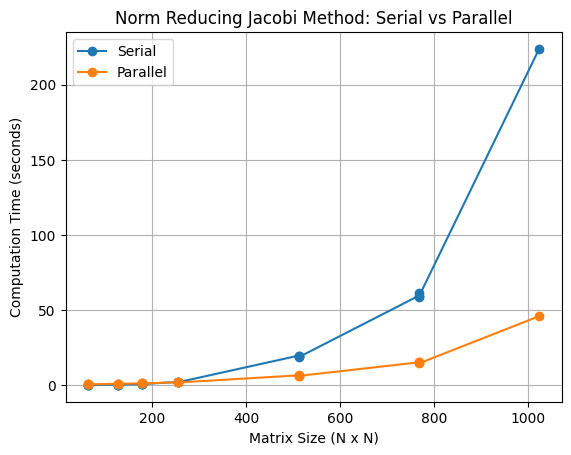

In [21]:
plt.plot(x[:-1], serial_times[:-1], label='Serial', marker='o')
plt.plot(x[:-1], parallel_times[:-1], label='Parallel', marker='o')
plt.legend()
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Computation Time (seconds)')
plt.title('Norm Reducing Jacobi Method: Serial vs Parallel')
plt.grid()

# decompose

In [22]:
ds = pd.read_csv('../data/output/decompose.csv')
ds.head()

,col,row,serial,parallel
0,768,3333,71.304,15.629
1,64,490,0.068,0.367
2,128,200,0.228,0.791
3,256,500,1.797,1.976
4,512,750,15.609,5.800


In [23]:
x = ds['row'].to_numpy() * ds['col'].to_numpy()
serial_times = ds['serial'].to_numpy()
parallel_times = ds['parallel'].to_numpy()

serial_times = serial_times[np.argsort(x)]
parallel_times = parallel_times[np.argsort(x)]
x = np.sort(x)

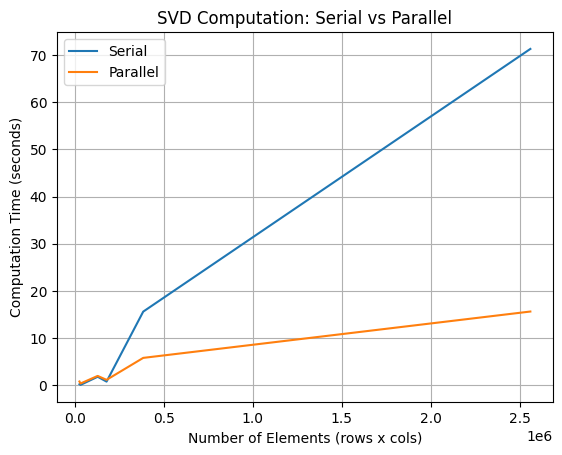

In [24]:
plt.plot(x, serial_times, label='Serial')
plt.plot(x, parallel_times, label='Parallel')
plt.legend()
plt.xlabel('Number of Elements (rows x cols)')
plt.ylabel('Computation Time (seconds)')
plt.title('SVD Computation: Serial vs Parallel')
plt.grid()

# argsort

In [25]:
df_sort = pd.read_csv('../data/output/argsort.csv')
df_sort.head()

,size,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,0.001,0.001,0.001,0.0,0.000,0.000,0.000,0.000,0.000,0.001,0.001,0.001
1,1000,0.001,0.000,0.000,0.0,0.000,0.001,0.001,0.001,0.001,0.001,0.001,0.001
2,1000,0.001,0.000,0.000,0.0,0.000,0.001,0.001,0.001,0.000,0.001,0.000,0.000
3,1000,0.000,0.000,0.000,0.0,0.001,0.000,0.001,0.000,0.000,0.001,0.001,0.000
4,1000,0.000,0.001,0.000,0.0,0.001,0.000,0.001,0.000,0.000,0.001,0.001,0.001


In [26]:
size = df_sort['size'].unique()
threads = [[] for _ in range(12)]
for s in size:
    for t in range(12):
        threads[t].append(df_sort[f'{t+1}'][df_sort['size']==s].mean())

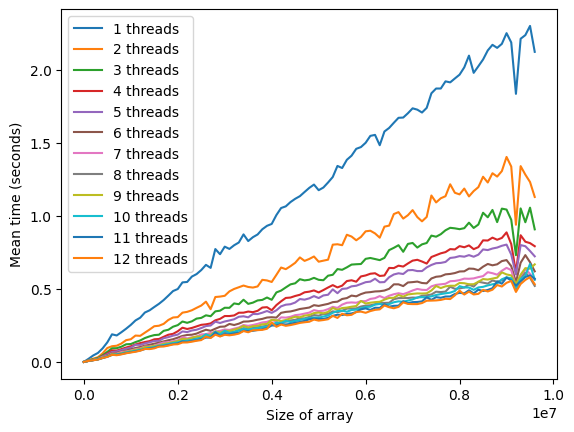

In [27]:
for t in range(12):
    plt.plot(size, threads[t], label=f"{t+1} threads")
plt.xlabel('Size of array')
plt.ylabel('Mean time (seconds)')


plt.legend()
plt.legend()


# square

In [28]:
df_square = pd.read_csv('../data/output/square.csv')
df_square.head()

,size,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,0.0,0.0,0.000,0.000,0.001,0.001,0.0,0.001,0.0,0.0,0.0,0.0
1,1000,0.0,0.0,0.000,0.001,0.001,0.000,0.0,0.000,0.0,0.0,0.0,0.0
2,1000,0.0,0.0,0.001,0.001,0.001,0.000,0.0,0.000,0.0,0.0,0.0,0.0
3,1000,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0
4,1000,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0


In [29]:
sizes = df_square['size'].unique()
threads = [[] for _ in range(12)]
for s in sizes:
    for t in range(12):
        threads[t].append(df_square[f'{t+1}'][df_square['size']==s].mean())

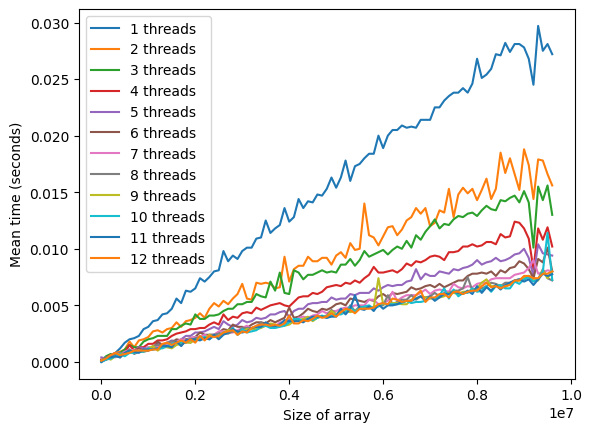

In [30]:
for t in range(12):
    plt.plot(size, threads[t], label=f"{t+1} threads")
plt.xlabel('Size of array')
plt.ylabel('Mean time (seconds)')


plt.legend()
plt.legend()


# tranpose

In [31]:
df_T = pd.read_csv('../data/output/transpose.csv')
df_T.head()

,size,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,0.0,0.0,0.0,0.0,0.0,0.001,0.0,0.001,0.001,0.0,0.000,0.0
1,1000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.000,0.0
2,1000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.001,0.0
3,1000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.001,0.000,0.0,0.000,0.0
4,1000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.001,0.000,0.0,0.000,0.0


In [32]:
size = df_T['size'].unique()
threads = [[] for _ in range(12)]
for s in size:
    for t in range(12):
        threads[t].append(df_T[f'{t+1}'][df_T['size']==s].mean())

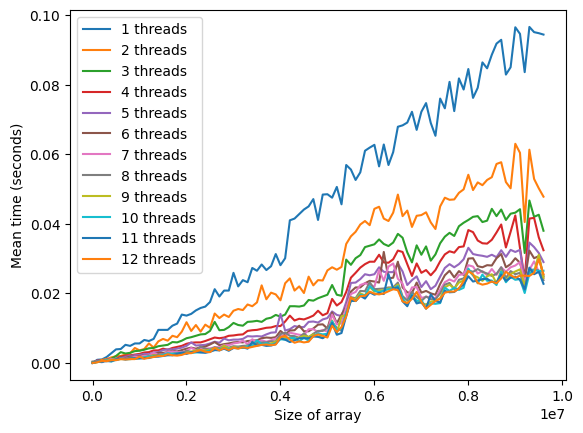

In [33]:
for t in range(12):
    plt.plot(size, threads[t], label=f"{t+1} threads")
plt.xlabel('Size of array')
plt.ylabel('Mean time (seconds)')


plt.legend()
plt.legend()


# QR eigen

In [34]:
qr_times = pd.read_csv('../data/output/qr_output.txt')
qr_times.head()

,rows,cols,qr_time,reconstruction_error,eigen_time
0,3000,1024,8.358,6.636098e-18,126.849
1,3333,768,6.342,5.881611e-18,77.920
2,490,64,0.057,8.147455e-21,5.038
3,200,128,0.103,8.503603e-21,10.057
4,500,256,0.227,5.716073e-20,27.562


In [35]:
x_qr = qr_times['cols'].to_numpy()
eigen_times = qr_times['eigen_time'].to_numpy()
x_ja = parallel['matrix_size'].to_numpy()
ja_times = parallel['computation_time_seconds'].to_numpy()

idx_qr = np.argsort(x_qr)
idx_ja = np.argsort(x_ja)
x_qr = x_qr[idx_qr]
eigen_times = eigen_times[idx_qr]
x_ja = x_ja[idx_ja]
ja_times = ja_times[idx_ja] 

Text(0.5, 1.0, 'Eigenvalue Computation: QR Method vs Jacobi Method')

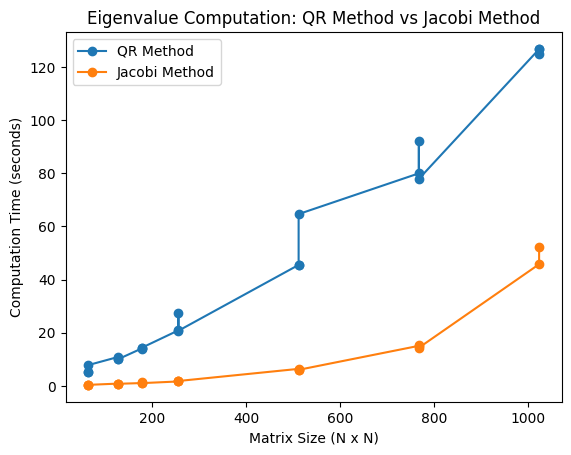

In [36]:
plt.plot(x_qr, eigen_times, label='QR Method', marker='o')
plt.plot(x_ja, ja_times, label='Jacobi Method', marker='o')
plt.legend()
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Computation Time (seconds)')
plt.title('Eigenvalue Computation: QR Method vs Jacobi Method')

# Lapack compare svd

In [37]:
lp = pd.read_csv('../data/output/lapack_svd_output.txt')
lp.head()

,col,row,lapack_time
0,768,3333,10.166
1,64,490,0.008
2,128,200,0.022
3,256,500,0.159
4,512,750,1.518


In [ ]:
x = lp['col'].to_numpy() * lp['row'].to_numpy()
x = np.unique(x)
time_lp = []
for i in range(len(x)):
    time_lp.append(lp['lapack_time'].to_numpy()[lp['col'].to_numpy() * lp['row'].to_numpy() == x[i]].mean() )

time_lp = np.array(time_lp)
idx = np.argsort(x)
time_lp = time_lp[idx]
x = x[idx]

array([2.2000e-02, 8.0000e-03, 1.5900e-01, 1.2000e-01, 1.5180e+00,
       1.0166e+01])

In [46]:
ds = pd.read_csv('../data/output/decompose.csv')
x_p =  ds['row'].to_numpy() * ds['col'].to_numpy()
x_p = np.unique(x_p)
time_ds = []
for i in range(len(x_p)):
    time_ds.append(ds['parallel'].to_numpy()[ds['row'].to_numpy() * ds['col'].to_numpy() == x_p[i]].mean() )
time_ds = np.array(time_ds)
idx_p = np.argsort(x_p)
time_ds = time_ds[idx_p]
x_p = x_p[idx_p]

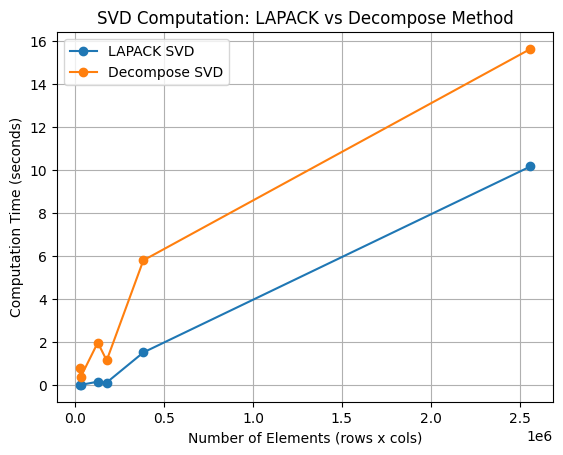

In [53]:
plt.plot(x, time_lp, label='LAPACK SVD', marker='o')
plt.plot(x_p, time_ds, label='Decompose SVD', marker='o')

plt.legend()
plt.xlabel('Number of Elements (rows x cols)')
plt.ylabel('Computation Time (seconds)')
plt.title('SVD Computation: LAPACK vs Decompose Method')
plt.grid()